In [1]:
#Library:

%matplotlib inline
import numpy as np
import math
import random
#import matplotib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib as mpl
import pandas as pd
from scipy.special import jv
from scipy import stats

#set the cosmology
from astropy.cosmology import FlatLambdaCDM
from astropy import constants as const
import astropy.units as u
from astropy.coordinates import SkyCoord
import os
import glob
#pulsar catalogues
from psrqpy import QueryATNF





#universal constant:
#universal constant: i want all in solar mass , second and Mpc
c=const.c.to('Mpc/ s') /(u.Mpc)*(u.s) # Mpc/s
G=const.G.to('Mpc3 /M_sun s2') /(u.Mpc**3)*(u.s**2)*(u.M_sun)

#universal constant:
#universal constant: i want all in solar mass , second and Mpc
c=const.c.to('Mpc/ s') /(u.Mpc)*(u.s) # Mpc/s
G=const.G.to('Mpc3 /M_sun s2') /(u.Mpc**3)*(u.s**2)*(u.M_sun)
# Create a FlatLambdaCDM instance
Hubble_h = 0.673
Omega_M = 0.315
Omega_Lambda = 0.683
cosmo = FlatLambdaCDM(H0=Hubble_h*100, Om0=Omega_M)

#year
yr_s = 31557600.;
f_yr = 1./yr_s 
#observation time
T_obs= 60*60*24*365*30

In [2]:
# Adding figure style
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('default')
#rc('text', usetex=True)

colors=['#435A9D', '#AB2135','#5A9D58','#FF7C0A','#6F380B', '#0F0806']

# FONT SIZE
mpl.rcParams['font.size'] = 14

# PATCH LINE WIDTH
mpl.rcParams['patch.linewidth'] = 1

# FIGURE DPI
plt.rcParams['figure.dpi'] = 120

# tick parameters:
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.minor.visible']    =   True
mpl.rcParams['ytick.minor.visible']    =   True
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] =  3
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] =1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['xtick.minor.pad'] = 6
mpl.rcParams['ytick.minor.pad'] = 6
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.handletextpad'] = 0.6

#setting:
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['font.size'] = 10.0
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['text.usetex'] = True

#axes & ticks
#mpl.rcParams['axes.edgecolor'] = 'black'
#mpl.rcParams['axes.linewidth'] = 1.7
#mpl.rcParams['axes.grid'] = False
#mpl.rcParams['axes.titlesize'] = 'x-large'
#mpl.rcParams['axes.labelsize'] =  'x-large'
mpl.rcParams['axes.labelweight'] = 'normal'
#mpl.rcParams['axes.labelcolor'] = 'black'
#mpl.rcParams['axes.formatter.limits'] = -4, 4

In [3]:
fname= 'SKA_PsrPopPy.det'
fp=open(fname,'r')

P_ms = np.genfromtxt(fname,usecols=1,skip_header=1)
P_1 = np.genfromtxt(fname,usecols=2,skip_header=1)
        
# when reading -det files we drop only the first line
GL = np.genfromtxt(fname,usecols=3,skip_header=1)
GB = np.genfromtxt(fname,usecols=4,skip_header=1)
#sky coord SKA
sky_coord_gal_SKA = SkyCoord(l=GL*u.deg, b=GB*u.deg,  galcen_distance=8.5 * u.kpc, frame='galactic')
sky_coord_SKA = sky_coord_gal_SKA.icrs
sky_coord_SKA_icrs = sky_coord_gal_SKA.icrs
RA_SKA_icrs = np.zeros(len(sky_coord_SKA_icrs))
DEC_SKA_icrs = np.zeros(len(sky_coord_SKA_icrs))
for i in range (len(RA_SKA_icrs)):
    RA_SKA_icrs[i]  = sky_coord_SKA_icrs[i].ra.deg
    DEC_SKA_icrs[i] = sky_coord_SKA_icrs[i].dec.deg

phi_SKA_icrs_rad = RA_SKA_icrs*np.pi/180.
theta_SKA_icrs_rad = np.pi/2 - DEC_SKA_icrs*np.pi/180.



In [4]:
#red noise:
#EPTA full

A_rn = np.array([-14.93,-14.99,-14.05,-14.19,-14.12,-14.89])

y_rn = np.array([5.49,5.34,2.86,3.28,3.45,4.77])


# Perform linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(A_rn, y_rn)

n_red  = len(RA_SKA_icrs)
A_red = np.zeros([n_red])
y_red = np.zeros([n_red])
for i in range(n_red):
    A_red[i] =  np.random.uniform(low=np.min(A_rn), high=np.max(A_rn))
    y_red[i] =  slope * A_red[i] + intercept + np.random.normal(0, std_err)
A_red = 10.**(A_red)

In [9]:
#files name
#Universe name
input_array = []
N_pop = 100#Pulsar NUmber of population to generate
for i in range(0,N_pop): #model
    input_array.append("PulsarPop_N_"+str(i)+".dat")

#slect the pulsar:
flux = np.genfromtxt(fname,usecols=5,skip_header=1) #Pulsar radio flux
weight = flux #Generate a Pop of Pulsars where -> the most prbable to be observed are the ones with the highe flux
weight_norm = weight/np.sum(weight)
n_pulsar = 200 #Number of pulsar of the array
for i in range(N_pop):
    random_array = np.random.choice(len(weight_norm),size=n_pulsar,replace=False,p=weight_norm)
    phi_rel = phi_SKA_icrs_rad[random_array]
    theta_rel = np.pi/2 - DEC_SKA_icrs[random_array]*np.pi/180.

    #red noise
    A_red_rel = A_red[random_array]
    y_red_rel = y_red[random_array]

    #for 140 pulsar only white noie
    n_white = random.sample(range(0, 200), 140)
    A_red_rel[n_white] = 0.
    y_red_rel[n_white] = 0.

    with open('Pulsar_Pop/'+input_array[i], 'w') as G:
        G.seek(0)
        np.savetxt(G,np.c_[phi_rel,theta_rel, A_red_rel, y_red_rel])
        G.close() 

1.0


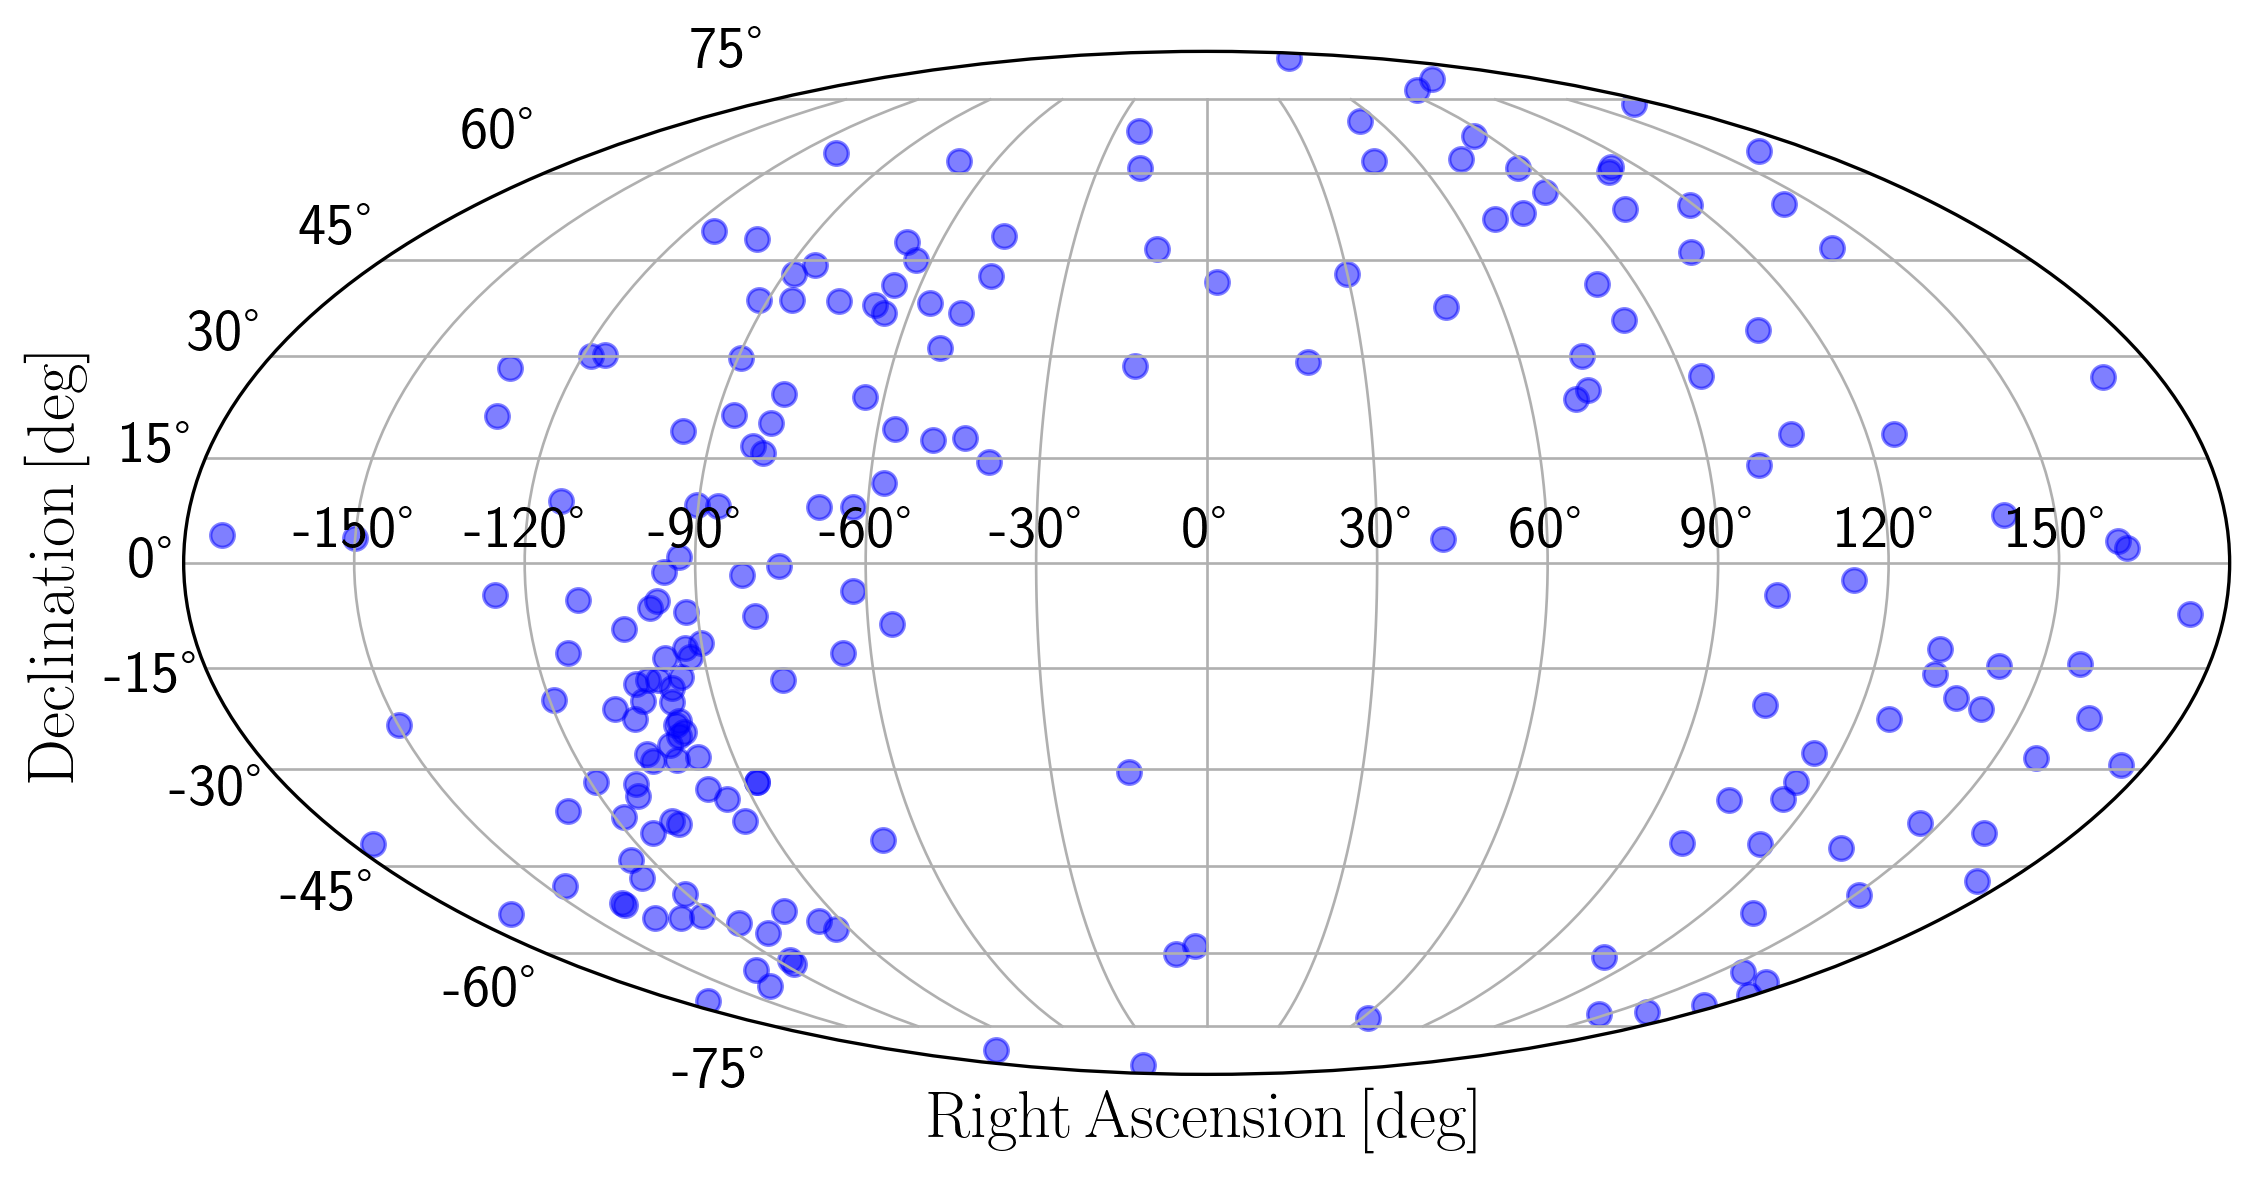

In [10]:
#plot one realization: mellow projection
fname= 'SKA_PsrPopPy.det'
fp=open(fname,'r')
# when reading -det files we drop only the first line
GL = np.genfromtxt(fname,usecols=3,skip_header=1)
GB = np.genfromtxt(fname,usecols=4,skip_header=1)
#compute weight
weight = flux
weight_norm = weight/np.sum(weight)
print(np.sum(weight_norm))
#number of elemts:
n_pulsar = 200
random_array = np.random.choice(len(weight_norm),size=n_pulsar,replace=False,p=weight_norm)

GL = GL[random_array]
GB = GB[random_array]
#sky coord SKA
sky_coord_gal_SKA = SkyCoord(l=GL*u.deg, b=GB*u.deg,  galcen_distance=8.5 * u.kpc, frame='galactic')
sky_coord_SKA = sky_coord_gal_SKA.icrs
# Plot the sky hemisphere
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
#fig = plt.figure(figsize=(10, 5))
#ax = fig.add_subplot(111, projection='mollweide')
sky_coord_SKA_icrs = sky_coord_gal_SKA.icrs

# Plot the sky hemisphere
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(111, projection='mollweide')

ax.scatter(sky_coord_SKA_icrs.ra.wrap_at(180 * u.deg).radian, sky_coord_SKA_icrs.dec.radian, s=50, alpha=0.5,color='blue',rasterized=True)#,label='SKA',rastarized=True)

#ax.scatter(sky_coord_1751.l.wrap_at(180 * u.deg),sky_coord_1751.b,color='red')
ax.legend(loc='upper right',bbox_to_anchor=(1., 1.05),fontsize=14)
ax.grid(True)
ax.set_xlabel(r'$\rm Right \, Ascension \, [deg]$',fontsize=20)
ax.set_ylabel(r'$\rm Declination \, [deg]$',fontsize=20)

plt.show()